<p style="font-size:300%;font-family:Source Sans Pro;text-align:center;line-height:50px;">Final Project<br>Spotify songs of Rolling Stones</p>

<table style="width:100%;font-family:'Roboto'; font-size:120%">
  <tr>
    <th colspan="3" style="text-align: center; vertical-align: middle;">
      MEMBERS & TASKS  
    </th>
  </tr>
  <tr>
    <th style="text-size:150%; text-align: center; vertical-align: middle;">ID</th>
    <th style="text-align: center; vertical-align: middle;">NAME</th>
    <th style="text-align: center; vertical-align: middle;">TASK</th>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127597</td>
    <td style="text-align: left; vertical-align: middle;">Bùi Tấn Phương</td>
  </tr>
  <tr>
    <td style="text-align: left; vertical-align: middle;">20127525</td>
    <td style="text-align: left; vertical-align: middle;">Trần Quốc Trung</td>
  </tr>
</table>

In [48]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [121]:
pd.set_option('display.max_rows', None)

# 1. Data collection:

**Subject:** Spotify Top 200 Charts (2020-2021)  
**Source:** [Spotify Top 200 Charts (2020-2021)](www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021)  
**Author's consent & License:** This dataset was uploaded onto Kaggle by [SASHANK PILLAI](www.kaggle.com/sashankpillai) with *Data files © Original Authors* license.  
**Author data collection method:** This dataset would not be possible without the help of spotifycharts.com and Spotipy Python Library.  

# 2. Exploring data:

In [49]:
df = pd.read_csv('spotify_dataset.csv')
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


We can see a redundant column `Index` **&rarr; So, We can set it as index**.  
Additionally, we can modify name columns name (replace blank space, convert to lowercase) for further analyzation to be more convinient.

In [50]:
def modifyColumnsName(x):
    res = x.replace('(', '')
    res = res.replace(')', '')
    res = res.replace(' ', '_')
    res = res.lower()
    return res

df = df.set_index('Index')
df.index.name = None

df.columns = list(map(lambda _ : modifyColumnsName(_), df.columns.tolist()))
df.head()

,highest_charting_position,number_of_times_charted,week_of_highest_charting,song_name,streams,artist,artist_followers,song_id,genre,release_date,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,chord
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


## Number of rows and columns?

In [51]:
n_rows, n_cols = df.shape
print(f'Dataset has {n_rows} rows and {n_cols} columns!')

Dataset has 1556 rows and 22 columns!


## Are there any duplicates? 

In [52]:
any(df.duplicated())

False

## Meaning of each columns:

The dataset include all the songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The dataset include the following features:

- `Highest Charting Position`: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Number of Times Charted`: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Week of Highest Charting`: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song Name`: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Song iD`: The song ID provided by Spotify (unique to each song).
- `Streams`: Approximate number of streams the song has.
- `Artist`: The main artist/ artists involved in making the song.
- `Artist Followers`: The number of followers the main artist has on Spotify.
- `Genre`: The genres the song belongs to.
- `Release Date`: The initial date that the song was released.
- `Weeks Charted`: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- `Popularity`:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- `Danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `Acousticness`: A measure from 0.0 to 1.0 of whether the track is acoustic.
- `Energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- `Liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- `Loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- `Speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- `Tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- `Valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `Chord`: The main chord of the song instrumental.

## What is the datatype of each column? Are there any columns with datatypes that are not suitable for further processing?

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   highest_charting_position  1556 non-null   int64 
 1   number_of_times_charted    1556 non-null   int64 
 2   week_of_highest_charting   1556 non-null   object
 3   song_name                  1556 non-null   object
 4   streams                    1556 non-null   object
 5   artist                     1556 non-null   object
 6   artist_followers           1556 non-null   object
 7   song_id                    1556 non-null   object
 8   genre                      1556 non-null   object
 9   release_date               1556 non-null   object
 10  weeks_charted              1556 non-null   object
 11  popularity                 1556 non-null   object
 12  danceability               1556 non-null   object
 13  energy                     1556 non-null   object
 14  loudness

**We should change dtype of:**
- "Release_Date" from `str` to `datetime`.  
- "Streams", "Artist_Followers", "Popularity" and "Duration_(ms)" from `str` to `int`.
- "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo" and "Valence" from `str` to `float`.

---

## Preprocessing:

### Drop fake `NaN` values:
With a quick glance, we can relize that this dataframe use **blank** character to replace `NaN` values. Moreover, if a row have one **blank**, almost its others features will be **blank**.

In [54]:
(df.loc[(df.release_date == ' ')] == ' ').sum(axis=0)

highest_charting_position     0
number_of_times_charted       0
week_of_highest_charting      0
song_name                     0
streams                       0
artist                        0
artist_followers             11
song_id                      11
genre                        11
release_date                 11
weeks_charted                 0
popularity                   11
danceability                 11
energy                       11
loudness                     11
speechiness                  11
acousticness                 11
liveness                     11
tempo                        11
duration_ms                  11
valence                      11
chord                        11
dtype: int64

Because there's not so much row, and they've lost most of data **&rarr; Drop it!**

In [55]:
df = df.loc[~(df.release_date == ' ')]
(df == ' ').sum(axis=0)

highest_charting_position    0
number_of_times_charted      0
week_of_highest_charting     0
song_name                    0
streams                      0
artist                       0
artist_followers             0
song_id                      0
genre                        0
release_date                 0
weeks_charted                0
popularity                   0
danceability                 0
energy                       0
loudness                     0
speechiness                  0
acousticness                 0
liveness                     0
tempo                        0
duration_ms                  0
valence                      0
chord                        0
dtype: int64

### Change dtype of "Release Date" to `datetime`

Initially, we can relize that "Release Date" features have `%Y-%m-%d` format. However, do all of them have that format?

In [56]:
pd.unique(df.release_date.apply(lambda x : len(x)))

array([10,  4,  7])

Surprisingly, there are 3 different types:
- 4 character format is `%Y` &rarr; we can suppose it is the first day of first month of this year.
- 7 character format is `%Y-%m` &rarr; we can suppose it is the first day of this month.
- The other is our expectation.

In [57]:
def fillMissingInfoDate(x):
    res = ''
    if len(x) == 4:
        res = x + '-01-01'
    elif len(x) == 7:
        res = x + '-01'
    else:
        res = x
    return res

df.release_date = pd.to_datetime(df.release_date.apply(fillMissingInfoDate), format='%Y-%m-%d')

### Change dtype of "Streams", "Artist_Followers", "Popularity" and "Duration_(ms)" from `str` to `int`.

In [58]:
df.streams = df.streams.str.replace(',', '')
int_features = ['streams', 'artist_followers', 'popularity', 'duration_ms']
df[int_features] = df[int_features].astype('int')

### Change dtype of "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo" and "Valence" from `str` to `float`.

In [59]:
float_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "tempo", "valence"]
df[float_features] = df[float_features].astype('float')

**Check again!**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   highest_charting_position  1545 non-null   int64         
 1   number_of_times_charted    1545 non-null   int64         
 2   week_of_highest_charting   1545 non-null   object        
 3   song_name                  1545 non-null   object        
 4   streams                    1545 non-null   int64         
 5   artist                     1545 non-null   object        
 6   artist_followers           1545 non-null   int64         
 7   song_id                    1545 non-null   object        
 8   genre                      1545 non-null   object        
 9   release_date               1545 non-null   datetime64[ns]
 10  weeks_charted              1545 non-null   object        
 11  popularity                 1545 non-null   int64         
 12  dancea

**&rarr; It's OK!**

## Distribution:

## Data type

In [61]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

count        mean         std        min  \
highest_charting_position 1545.00       87.83       58.13       1.00   
number_of_times_charted   1545.00       10.68       16.39       1.00   
streams                   1545.00  6337136.38  3375402.18 4176083.00   
artist_followers          1545.00 14716902.87 16675788.51    4883.00   
popularity                1545.00       70.09       15.82       0.00   
danceability              1545.00        0.69        0.14       0.15   
energy                    1545.00        0.63        0.16       0.05   
loudness                  1545.00       -6.35        2.51     -25.17   
speechiness               1545.00        0.12        0.11       0.02   
acousticness              1545.00        0.25        0.25       0.00   
liveness                  1545.00        0.18        0.14       0.02   
tempo                     1545.00      122.81       29.59      46.72   
duration_ms               1545.00   197940.82    47148.93   30133.00   
valence                   1545.00        0.51        0.23       0.03   

                                 25%        50%         75%         max  
highest_charting_position      37.00      80.00      137.00      200.00  
number_of_times_charted         1.00       4.00       12.00      142.00  
streams                   4915080.00 5269163.00  6452492.00 48633449.00  
artist_followers          2123734.00 6852509.00 22698747.00 83337783.00  
popularity                     65.00      73.00       80.00      100.00  
danceability                    0.60       0.71        0.80        0.98  
energy                          0.53       0.64        0.75        0.97  
loudness                       -7.49      -5.99       -4.71        1.51  
speechiness                     0.05       0.08        0.17        0.88  
acousticness                    0.05       0.16        0.39        0.99  
liveness                        0.10       0.12        0.22        0.96  
tempo                          97.96     122.01      143.86      205.27  
duration_ms                169266.00  193591.00   218902.00   588139.00  
valence                         0.34       0.51        0.69        0.98

**&rarr; From above dataframe, we can relized there is not any missing values**

Almost everything looks OK, but we should change Dtype of release_date to datetime.

In [62]:
df.release_date = pd.to_datetime(df.release_date, format='%Y/%m/%d')
pd.DataFrame(pd.concat([df.dtypes, df.isnull().sum()], axis=1)).rename(columns={0:'type', 1:'null values'})

count unique                              top freq
week_of_highest_charting  1545     83           2019-12-27--2020-01-03   89
song_name                 1545   1545  Never Know (feat. SHIRIN DAVID)    1
artist                    1545    712                     Taylor Swift   52
song_id                   1545   1516           5uEYRdEIh9Bo4fpjDd4Na9    3
genre                     1545    394                               []   75
weeks_charted             1545    771           2020-12-18--2020-12-25   31
chord                     1545     12                            C#/Db  214

## Distribution

### Numeric

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974


From above dataframe, we can relized there is not any missing values and nothing wrong here

### Categorical

In [8]:
categorical_df = df.select_dtypes(include='O')
categorical_df.describe(include='O').T

,count,unique,top,freq
name,1610,954,Honky Tonk Women - Live,16
album,1610,90,Voodoo Lounge Uncut (Live),56
id,1610,1610,6efcLdcSYvjXJKYKiDdlyS,1
uri,1610,1610,spotify:track:3v9IBMSqQqdG8XYGOHIXkR,1


Similarly to numeric, we can easily relize there is not any missing value and everything is normal

In [9]:
categorical_diff_val = categorical_df.apply(lambda x : pd.unique(x))
categorical_num_diff_val = categorical_df.nunique()

pd.DataFrame([categorical_num_diff_val, categorical_diff_val], index=['number of different values', 'different values']).T

,number of different values,different values
name,954,"[Concert Intro Music - Live, Street Fighting M..."
album,90,"[Licked Live In NYC, Live At The El Mocambo, T..."
id,1610,"[2IEkywLJ4ykbhi1yRQvmsT, 6GVgVJBKkGJoRfarYRvGT..."
uri,1610,"[spotify:track:2IEkywLJ4ykbhi1yRQvmsT, spotify..."


$ chỗ này khá thừa

Something looklike abnormal in '*name*' column

In [10]:
index = df['name'].str.contains('-')
df['name'][index].value_counts().head(10)

Honky Tonk Women - Live                 16
Brown Sugar - Live                      16
Tumbling Dice - Live                    14
Sympathy For The Devil - Live           13
Start Me Up - Live                      12
Jumpin’ Jack Flash - Live               11
Miss You - Live                         11
Street Fighting Man - Live               9
Midnight Rambler - Live                  9
(I Can't Get No) Satisfaction - Live     9
Name: name, dtype: int64

The name of song before dash, and after that is extra information of song.

In [11]:
# df['extra_infor'] = df['name'].str.extract(r'-(.+)')

In [12]:
df['name'] = df['name'].str.extract(r'(.*?)?(-|$)').iloc[:,:1]

In [13]:
df['name']

0             Concert Intro Music 
1             Street Fighting Man 
2                     Start Me Up 
3            If You Can't Rock Me 
4                      Don’t Stop 
                   ...            
1605                         Carol
1606                       Tell Me
1607           Can I Get A Witness
1608    You Can Make It If You Try
1609               Walking The Dog
Name: name, Length: 1610, dtype: object

---

# Propose meaningfull question and answer them:
- How do song properties change overtime?
- Is this a good time to create music?
- What is the most successful time of Rolling-Stones?
- How many songs in the albums is good?
- How does an album attract listeners?
  
- Top music through each year ( objective ?)
- Potential trends of Rolling Stones?
    * ***objective***: Identify key factors that influence a song's popularity, find potential trends in popular music that will provide a guideline for **Rolling Stones**


### Preprocessing

Insert '*year*' column base on release_date

In [14]:
df['year'] = df.release_date.dt.year

## How do song properties change overtime?

In [15]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'year'],
      dtype='object')

In [16]:
song_properties = df.loc[:, ['year', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']]

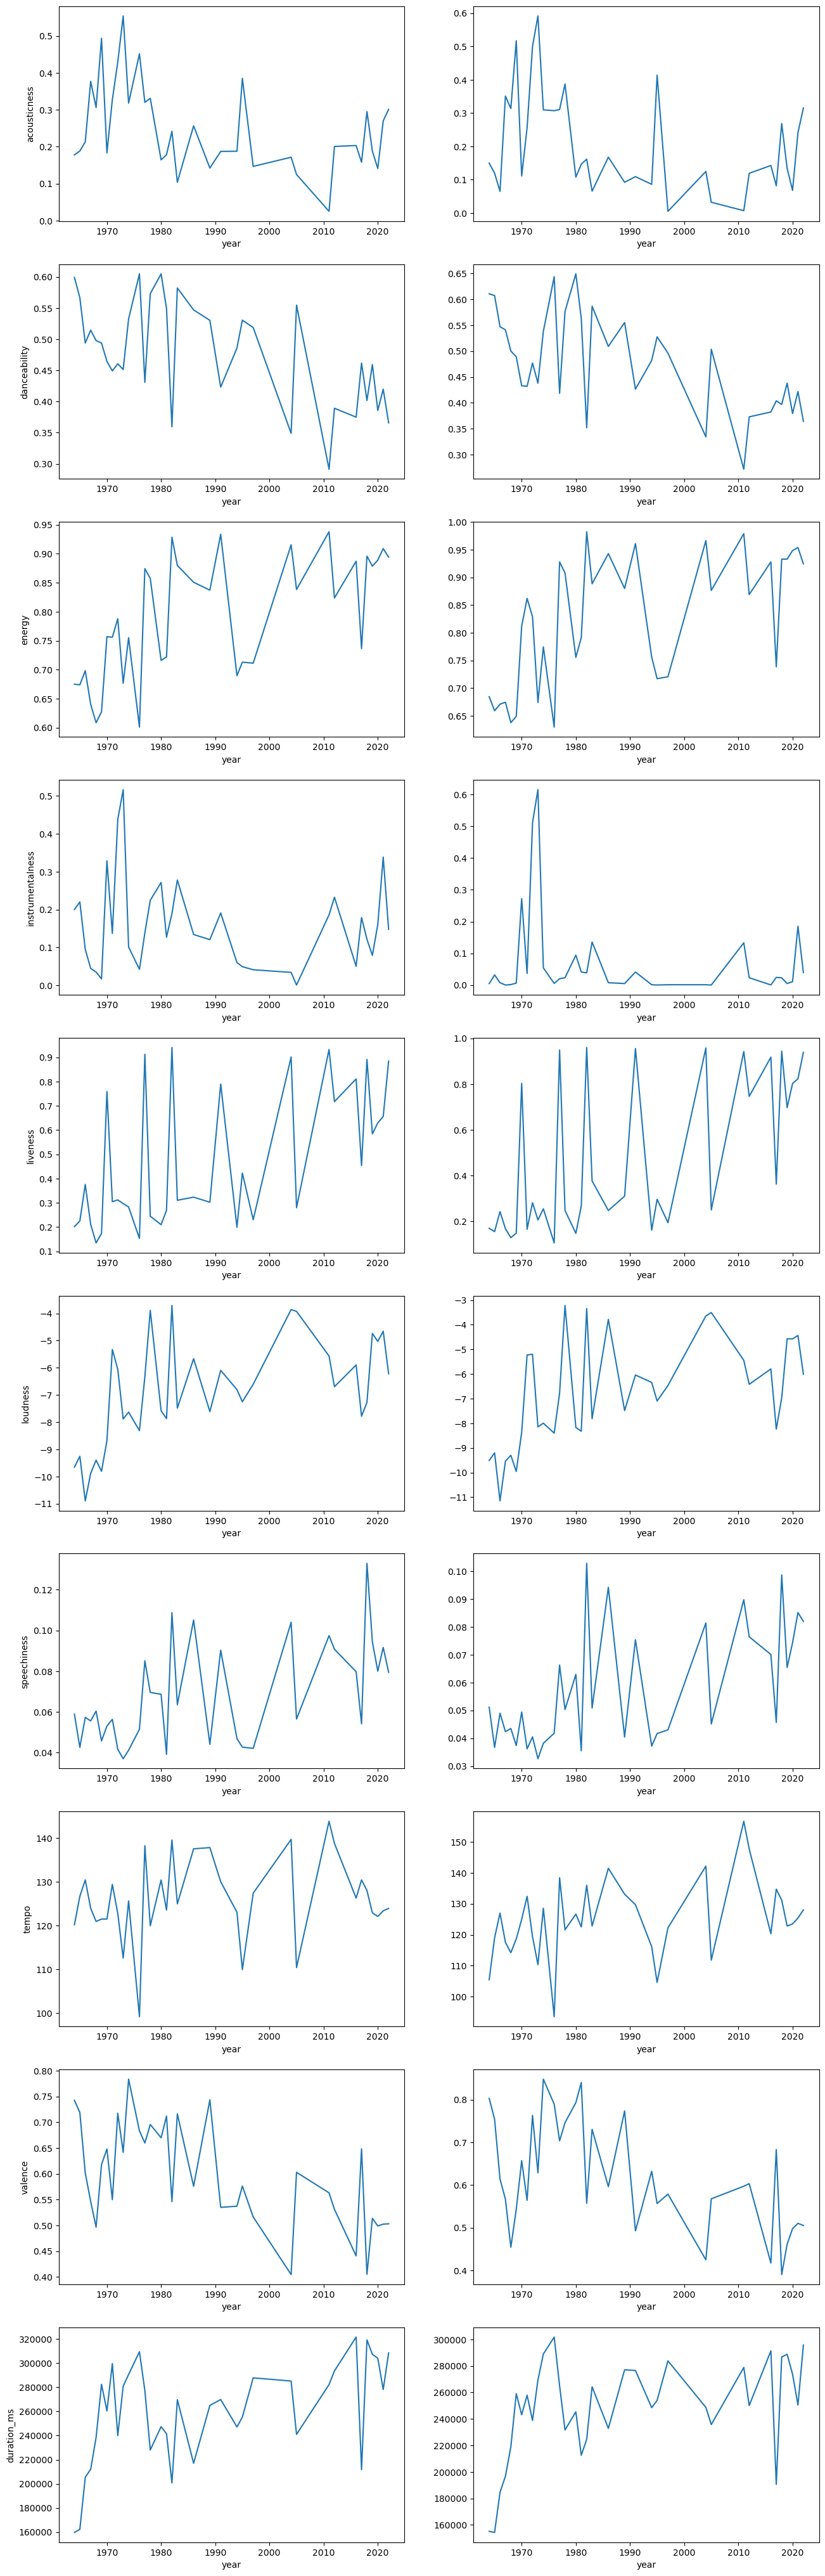

In [17]:
fig, axes = plt.subplots(10, 2, figsize=(15, 50))
properties = song_properties.columns[1:]
for p, ax in zip(song_properties.columns[1:], axes):
    meanline = song_properties.groupby('year', as_index=False)[p].mean()
    sns.lineplot(x=meanline.year, y=meanline[p], ci=None, ax=ax[0])  
    # sns.boxplot(x=song_properties.year, y=song_properties[p], showfliers=False, ax=ax[1])
    medianline = song_properties.groupby('year', as_index=False)[p].median()
    sns.lineplot(x=medianline.year, y=medianline[p], ci=None, ax=ax[1])
    ax[1].set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

From above plots, we can relize that:
- Accoustic and intrusmental music are popular in 1970s, when electronics was not developed. Therefore, music was just created from intrusments. Moreover, Accoustic have a short popular durations in 1990s
- Dance music have had a long popular time from late 1970s but it decrease overtime.
- Energetic track popular overtime. This type have strong beat, attractive and make people feel positive.
- Livesong could be normal overtime, because almost song could use for living!
- speechiness popularity has increase overtime but it reach at most a little bit 1.2. However, there has been a huge leap in recent years marking the growth of variations such as e-books, podcasts.
- There is a surprise that audience like listenning less valence music than before. It is the result of fully using romanticism material to compose.
- Because of popularity and development of dance and envergy, loudness and tempo also increase over those time.
- Duration of a track have not changed too much overtime, the normal duration is more than 4 minutes a little bit.

$ nên bỏ vào chart nhiều line

## Is this a good time to produce musics?

In [18]:
music_20_to_22 = df.loc[(df.year >= 2020) & (df.year <= 2022)]

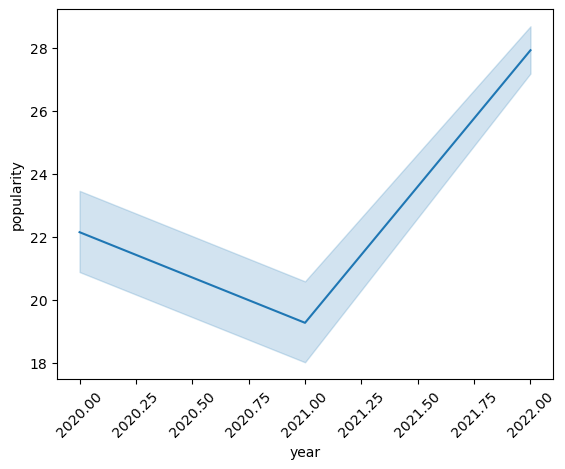

In [19]:
sns.lineplot(x=music_20_to_22.year, y=music_20_to_22.popularity)
plt.xticks(rotation=45)
plt.show()

music market increased in 2020-2021 period but has increased for this year **&rarr; This is the good time for release new songs!**

## Potential trends of Rolling Stones??

In [63]:
First i will get top 50 most successful songs with the most popularity.

In [22]:
top50_song = df.sort_values('popularity',ascending=False).head(50)
top50_song.describe().T[['min','max','mean']]

number of different values  \
week_of_highest_charting                         83   
song_name                                      1545   
artist                                          712   
song_id                                        1516   
genre                                           394   
weeks_charted                                   771   
chord                                            12   

                                                           different values  
week_of_highest_charting  [2021-07-23--2021-07-30, 2021-06-25--2021-07-0...  
song_name                 [Beggin', STAY (with Justin Bieber), good 4 u,...  
artist                    [Måneskin, The Kid LAROI, Olivia Rodrigo, Ed S...  
song_id                   [3Wrjm47oTz2sjIgck11l5e, 5HCyWlXZPP0y6Gqq8TgA2...  
genre                     [['indie rock italiano', 'italian pop'], ['aus...  
weeks_charted             [2021-07-23--2021-07-30\n2021-07-16--2021-07-2...  
chord                     [B, C#/Db, A, D#/Eb, G#/Ab, F#/Gb, C, D, A#/Bb...

I will working with above dataset **top50_song** to find the potential trends. To find the attributes that contributes to virality, I started analysis with trying to plotting some features against popularity to find possible correlation between them. I am utilizing scatterplots in sheets since it will be easy to identify common trends in the dataset simply by viewing how the data points clump together.

# 3. Propose meaningfull question and answer them:
- How did music change in 2020-2021 period?
- What was music trend in this period?
- How should we produce music to be on chart
for as long as possible?
- What is the best time in year to release music?

---
## Preprocessing:

- Because "week_charted" have multiple week **&rarr; We should `explode` it**.  
- We will add "start_week_charted" to represent its time.  
- Additionally, we will add "year" column for comparing between years. However, a song can stand on chart in both 2020 and 2021 **&rarr; So we also `explode` it**

In [64]:
song_properties = ['weeks_charted', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo', 'valence', 'duration_ms']
song_properties_df = df.loc[:, song_properties]

song_properties_df.weeks_charted = song_properties_df.weeks_charted.apply(lambda x : x.split('\n'))
song_properties_byweek_df = song_properties_df.explode('weeks_charted')
song_properties_byweek_df['start_week_charted'] = pd.to_datetime(song_properties_byweek_df.weeks_charted.apply(lambda x : (x.split('--')[0])))

def getYearOnBoard(weeks_on_chart):
    start = datetime.strptime(weeks_on_chart[-1].split('--')[0], '%Y-%m-%d')
    end = datetime.strptime(weeks_on_chart[0].split('--')[1], '%Y-%m-%d')
    years = [start.year] if start.year == end.year else [start.year, end.year]
    
    return years

song_properties_df['year'] = song_properties_df.weeks_charted.apply(getYearOnBoard)
song_properties_byyear_df = song_properties_df.explode('year')

---
## How did music properties change in the 2020-2021 period?

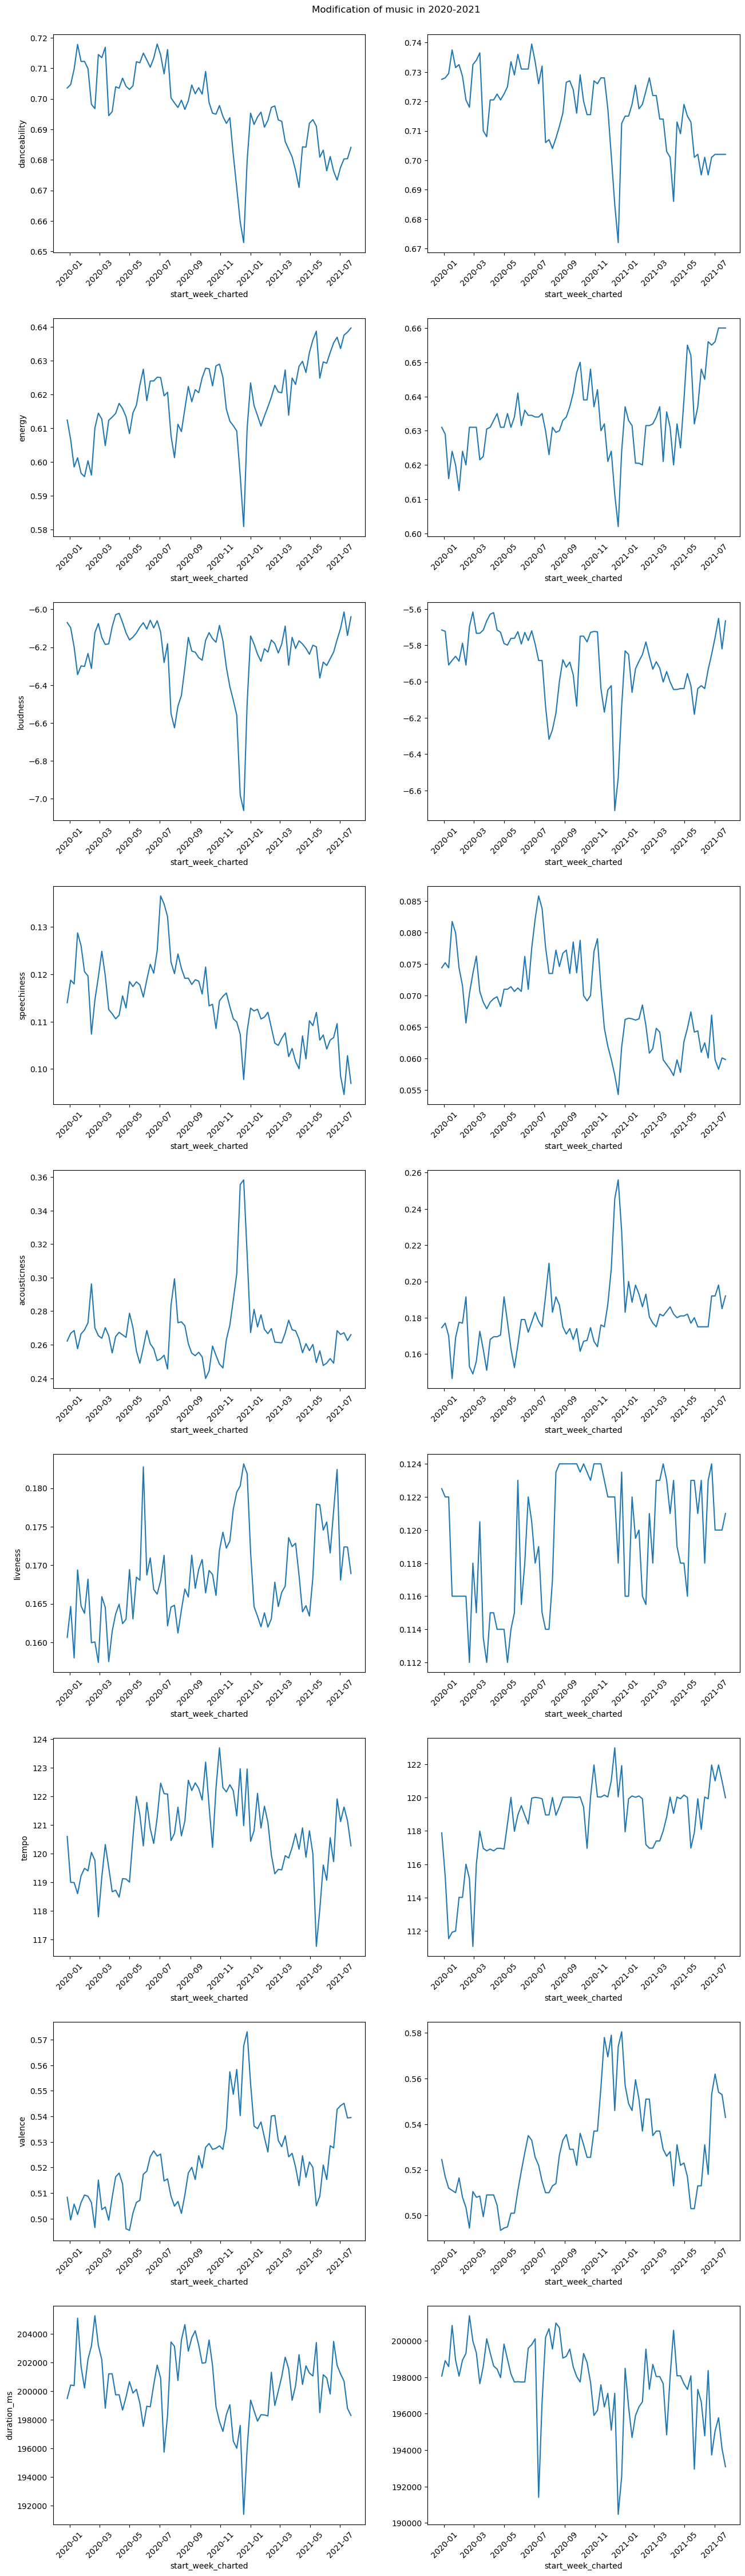

In [65]:
fig, axes = plt.subplots(9, 2, figsize=(15, 50))
fig.suptitle("Modification of music in 2020-2021")
# fig.subplots_adjust(top=0.9)
properties = song_properties_df.columns[1:]
for p, ax in zip(properties, axes):
    # sns.violinplot(song_properties_byweek_df[p], ax=ax[0])
    # ax[0].tick_params('x', labelrotation=45)

    meanline = song_properties_byweek_df.groupby('start_week_charted', as_index=False)[p].mean()
    sns.lineplot(x=meanline.start_week_charted, y=meanline[p], ci=None, ax=ax[0])  
    ax[0].tick_params('x', labelrotation=45)

    medianline = song_properties_byweek_df.groupby('start_week_charted', as_index=False)[p].median()
    sns.lineplot(x=medianline.start_week_charted, y=medianline[p], ci=None, ax=ax[1])
    ax[1].tick_params('x', labelrotation=45)
    ax[1].set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.97,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

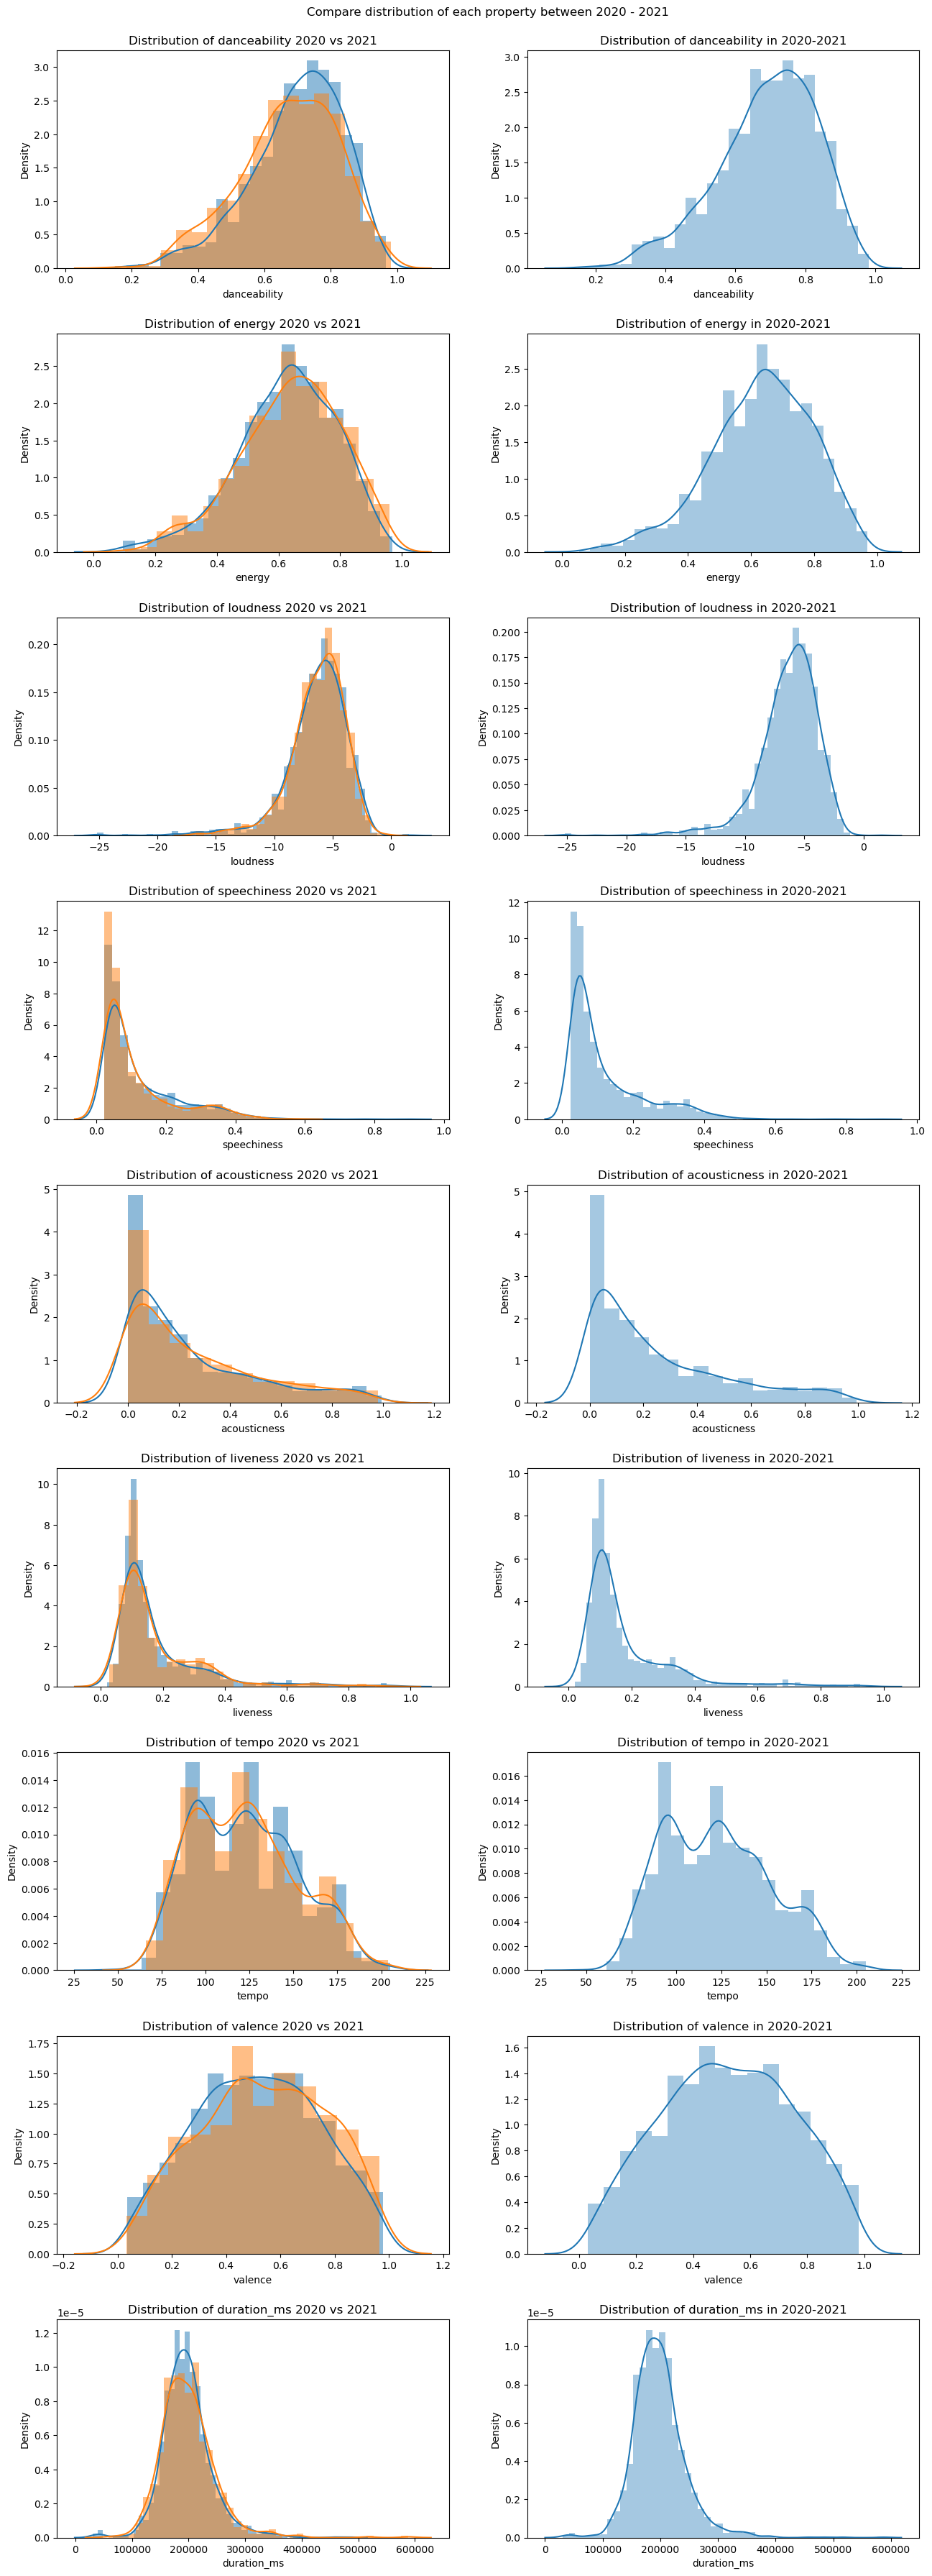

In [66]:
fig, axes = plt.subplots(9, 2, figsize=(15, 40))
for p, ax in zip(properties, axes):
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year.isin([2019, 2020])), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    sns.distplot(song_properties_byyear_df.loc[(song_properties_byyear_df.year == 2021), p], hist_kws=dict(alpha=0.5), ax=ax[0])
    ax[0].title.set_text(f'Distribution of {p} 2020 vs 2021')
    sns.distplot(song_properties_byyear_df[p], ax=ax[1])
    ax[1].title.set_text(f'Distribution of {p} in 2020-2021')

fig.suptitle('Compare distribution of each property between 2020 - 2021')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.965,
                    wspace=0.2,
                    hspace=0.3)

plt.show()

From above plots, we can conclude:
- In general, properties did not change between 2020 and 2021
- **danceability** property was high but decreased during this duration.
- **energy** was not as high as **danceability** but increased.
- **loudness** did not vary too much, it could be standard loud for a song.
- **speeechiness** started inscreasingly from early 2020 which marked talk shows, audio books, tell story songs (in Covid-19 duration, music production interupted). However, after half of year, it descreased.
- **liveness** was low in almost time. However, it strongly increased in summer and winter season because it could be the good time to go performing (it could be the consequence of online music platform).
- **tempo**  was surpringly low in early 5 month of 2020 and back to normal level in 6 months later. However, it was low again!
- **valence** was higher than average a little bit but increased.
- **duration_ms** was like **loudness**, there were only 2 strongly decreasing period.
- **accousticness** was low in almost time but strongly increased in December. 
- There was a fact that almost properties declined in December except ***Accousticness***. It could be Christmas occasion whose songs ussally is created from instrument.

---
## Preprocessing:
Before we answer the second question, we have to do something with "genre" columns for convenient analysis.

In [67]:
def extractMainGenre(x):
    listGenre = x[2:-2].split("', '")
    res = []
    for genre in listGenre:
        # befSize = len(res)
        if 'indie' not in res and (genre.find('indie') != -1 or genre.find('singer-songwriter') != -1):
            res.append('indie')
        if 'rock' not in res and (genre.find('rock') != -1):
            res.append('rock')
        if 'pop' not in res and (genre.find('pop') != -1):
            res.append('pop')
        if 'underground' not in res and (genre.find('hip hop') != -1 or genre.find('rap') != -1):
            res.append('underground')
        if 'latin' not in res and (genre.find('latin') != -1):
            res.append('latin')
        if 'r&b' not in res and (genre.find('r&b') != -1 or genre.find('soul') != -1):
            res.append('r&b')
        if 'dance' not in res and (genre.find('house') != -1 or genre.find('dance') != -1 or genre.find('techno') != -1):
            res.append('dance')
        if 'electro' not in res and (genre.find('edm') != -1 or genre.find('electro') != -1):
            res.append('electro')
        if 'country' not in res and (genre.find('country') != -1):
            res.append('country')
        if 'jazz' not in res and (genre.find('jazz') != -1 or genre.find('disco') != -1):
            res.append('jazz')
        
        # if len(res) != befSize and 'other' not in res:
        #     res.append('other')
    
    if len(res):
        return res
    else:
        return ['other']

df.genre = df.genre.apply(extractMainGenre)
trend_df = df.reindex(columns=['genre', 'popularity', 'streams']).explode('genre')

---
## What was music trend in this period?

Number of song in each genre in this period

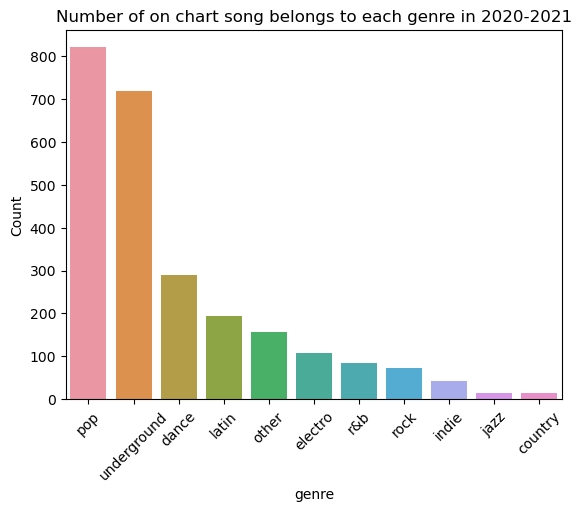

In [139]:
noSongs = trend_df.groupby('genre', as_index=False).size().sort_values('size', ascending=False)
sum_size = noSongs['size'].sum()
perChart = noSongs['size'].apply(lambda x: x/sum_size)
sns.barplot(data=noSongs, x='genre', y='size')
plt.xticks(rotation=45)
plt.title('Number of on chart song belongs to each genre in 2020-2021')
plt.ylabel('Count')
plt.show()

It simply infer that people tend to prefer listening `pop` and `underground` and not interest with `country`, `jazz` and `indie`  in this time. But to check if it's related to the number of songs produced, we will analyze base on mean of *popularity* and *streams*. 

We will get top 10 songs have the most popularity or streams in each genre.

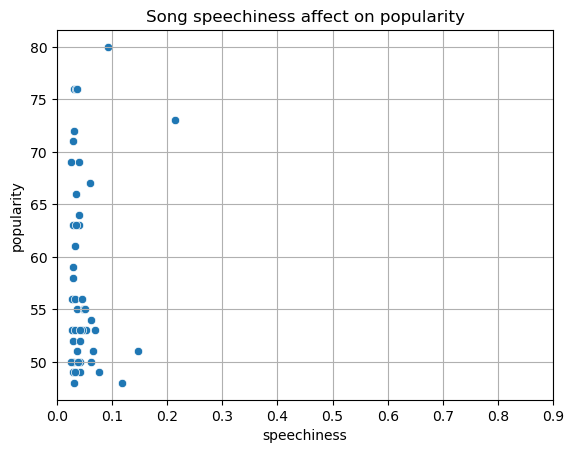

In [123]:

top10_each_genre = trend_df.sort_values('popularity',ascending=False).groupby('genre').head(10)
top10_each_genre = top10_each_genre.drop(['streams'],axis=1).groupby('genre',as_index = False).mean()

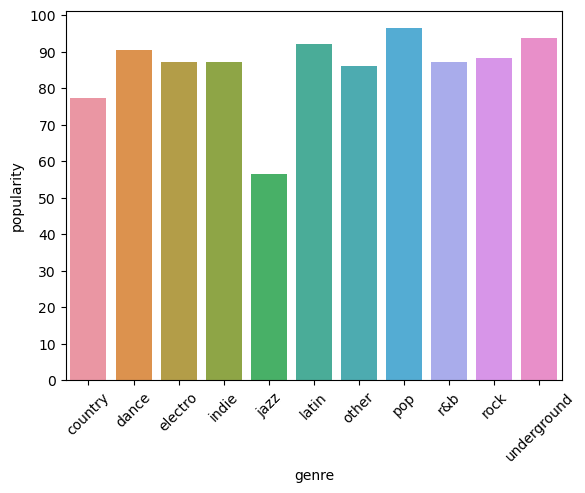

In [125]:
sns.barplot(data=top10_each_genre, x="genre", y="popularity")
plt.xticks(rotation=45)
plt.yticks(np.arange(0,100.1,10))
plt.show()

Observate on barchar, the average *popularity* of `pop` and `underground` belong to top highest. Beside that, `country` and `jazz` are lower than other. `indie` look have high popularity so that we can't suppose that people don't like `indie`

In [126]:
top10_each_genre = trend_df.sort_values('streams',ascending=False).groupby('genre').head(10)
top10_each_genre = top10_each_genre.drop(['popularity'],axis=1).groupby('genre',as_index = False).mean()

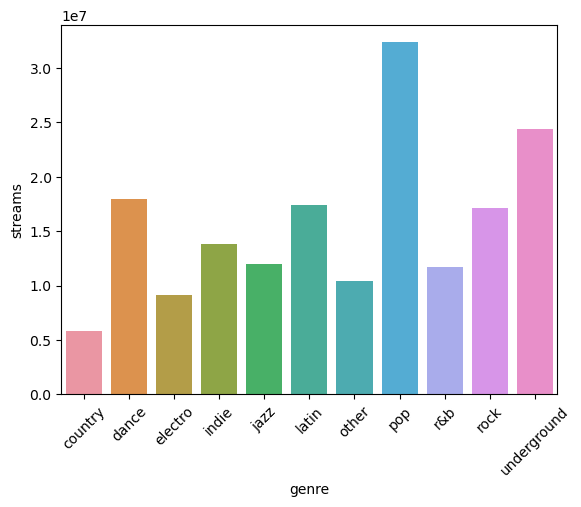

In [127]:
sns.barplot(data=top10_each_genre, x="genre", y="streams")
plt.xticks(rotation=45)
plt.show()

The average *popularity* of `pop` and `underground` still on top. Otherwise, `country` and `jazz` don't have much streams

***Conclude***: With the evaluations and observations we have made we would concluded that people tend to prefer listening `pop` and `underground` and not interest with `country`, `jazz`